# Первая лабораторная работа по ML

| Студент | Суханов Е.А. |
|---------|--------|
| Группа  | М8О-406Б-19      |

Загрузим датасет

In [1]:
import pandas as pd
import numpy as np

ds = pd.read_csv("ds.csv")
ds.head()

,AgeCategory,GenHealth,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDiseaseOrStroke,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,Diabetic_No,Diabetic_Yes
0,8,1,16.60,3.0,30.0,5.0,0.0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
1,13,1,20.34,0.0,0.0,7.0,1.0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
2,10,-1,26.58,20.0,30.0,8.0,0.0,0,1,1,...,0,1,0,1,1,0,1,0,0,1
3,12,0,24.21,0.0,0.0,6.0,0.0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
4,5,1,23.71,28.0,0.0,8.0,0.0,1,0,1,...,0,1,1,0,1,0,1,0,1,0


In [2]:
from sklearn.model_selection import train_test_split
X = ds.drop("HeartDiseaseOrStroke", axis=1).to_numpy()
Y = ds["HeartDiseaseOrStroke"].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
print(x_train.shape, x_test.shape)

(239846, 24) (79949, 24)


In [3]:
# Мой датасет имеет особенность: отношение "yes" к "no" в целевом свойстве очень мало.
# Поэтому я решил написать "балансер", который балансирует это отношение.
# (делает его равным factor)
def balance(x,y, factor=0.5, shuffle=True):
    x_true = x[y > 0.5]
    y_true = y[y > 0.5]
    x_false = x[y < 0.5]
    y_false = y[y < 0.5]
    m = len(x_false)
    n = min(len(x_true), int(m*factor))
    m = min(m, int(n/factor))
    x_res = np.vstack([x_true[:n], x_false[:m]])
    y_res = np.hstack([y_true[:n], y_false[:m]])
    def unison_shuffled_copies(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]
    if shuffle:
        x_res, y_res = unison_shuffled_copies(x_res, y_res)
    return x_res, y_res

x_train_balanced, y_train_balanced = balance(x_train, y_train, factor=1)
print(x_train_balanced.shape, y_train_balanced.shape)
# x_test_balanced, y_test_balanced = balance(x_test, y_test, factor=0.5)
# print(x_test_balanced.shape, y_test_balanced.shape)

(52332, 24) (52332,)


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score
# Построим матрицу неточности
def plot_confusion_matrix(y, pred, name):
    cm = confusion_matrix(y, pred)
    # cm = cm / cm.sum() # normolize
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax,)
    plt.show()

def metrics(pred, y_test):
    print("Accuracy:", accuracy_score(y, pred))
    print("Recall:", recall_score(y, pred))
    print("Precision:", precision_score(y, pred))
    print("Roc-auc:", roc_auc_score(y, pred))

# Создаим фунцию для подсчета и вывода различных метрик и пр.
def info(y, pred, sk_pred):
    print("Accuracy:", accuracy_score(y, pred))
    print("Accuracy sklearn model:", accuracy_score(y, sk_pred))
    print("Recall:", recall_score(y, pred))
    print("Recall sklearn model:", recall_score(y, sk_pred))
    print("Precision:", precision_score(y, pred))
    print("Precision sklearn model:", precision_score(y, sk_pred))
    print("Roc-auc:", roc_auc_score(y, pred))
    print("Roc-auc sklearn model:", roc_auc_score(y, sk_pred))
    plot_confusion_matrix(y, pred, "My model")
    plot_confusion_matrix(y, sk_pred, "sklearnModel")

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()

### Linear Regression

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [174]:
class LinearRegression(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
        
    def predict(self, X):
        pred = X @ self.w
        return pred
    
    def get_weights(self):
        return self.w

In [186]:
model = Pipeline([("Scaler", scaler), ("Linear", LinearRegression())])
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
my_pred = np.where(pred > np.mean(pred), 1.0, 0.0)

-10.0 12.0


In [187]:
model = Pipeline([("Scaler", scaler), ("Linear", linear_model.LinearRegression())])
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(min(pred), max(pred))
sk_pred = np.where(pred > np.mean(pred), 1.0, 0.0)

-0.16348842705689431 0.6911258307556056


Accuracy: 0.518267895783562
Accuracy sklearn model: 0.6473877096649113
Recall: 0.32620681894902664
Recall sklearn model: 0.8651963542252729
Precision: 0.0818348623853211
Precision sklearn model: 0.22170001730004035
Roc-auc: 0.4342469179600611
Roc-auc sklearn model: 0.7426724784269816


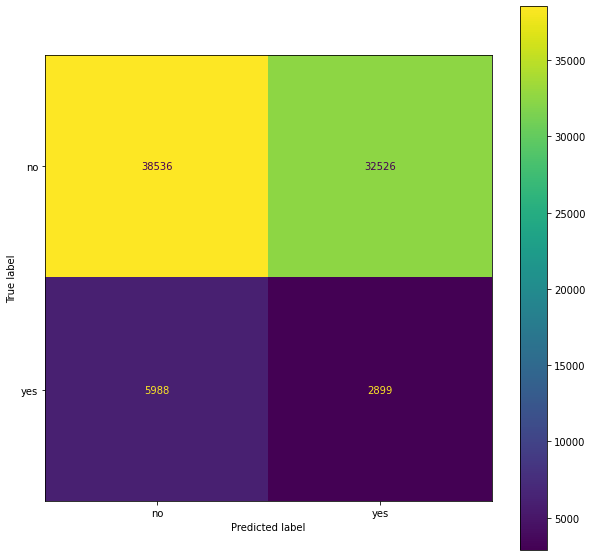

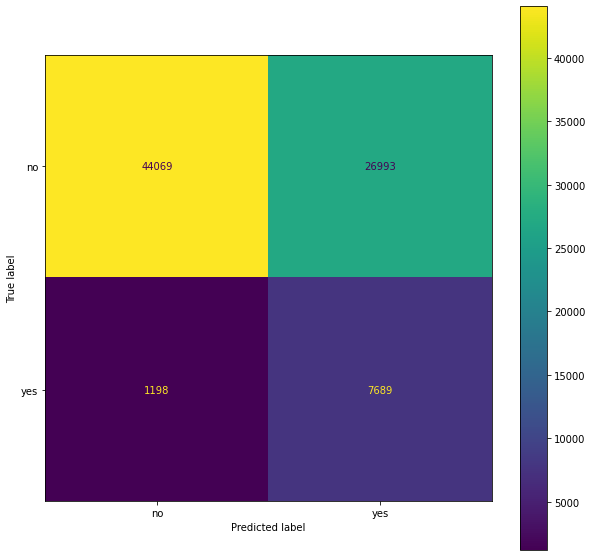

In [188]:
info(y_test, my_pred, sk_pred)

Линейная регрессия плохо подходит для классификации. Так как результат предсказания модели нужно пропустить через функцию, которая будет давать окончательный ответ.

Несмотря на низкую точность, можно заметить, что модель имеет высокий recall. Это означает, что когда человек действительно болен ССЗ (сердечно-сосудистым заболеванием), то модель это с высокой вероятностью обнаруживает.

Однако у моделей много ложных срабатываний, о чем нам говорит precision.

Тем не менее, в нашей задаче важно иметь высокий recall.

Также я заметил что данная модель чувствительна к нормированию данных. 


### Logistic Regression

In [99]:
class LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr = 0.05, max_iters = 100):
        self.lr = lr
        self.max_iters = max_iters

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        for i in range(self.max_iters):
            self.update(X, Y)
        return self

    def get_params(self, deep = True):
        return {"lr": self.lr, "max_iters" : self.max_iters}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def update(self, X, Y):
        z = X.dot(self.w)
        a = 1 / (1 + np.exp(-z))
        grad = (a - Y.T)
        grad = np.reshape(grad, self.m)
        dW = np.dot(X.T, grad) / self.m
        db = np.sum(grad) / self.m
        self.w = self.w - self.lr * dW

        return self

    def predict(self, X) :
        z = X.dot(self.w)
        pred = 1 / ( 1 + np.exp(-z))
        return np.where(pred > 0.5, 1.0, 0.0)

In [205]:
model = Pipeline([("Scaler", scaler),("LogReg", LogisticRegression(max_iters=100))])
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.predict(x_test)
print(min(my_pred), max(my_pred))
print(accuracy_score(y_test, my_pred))

0.0 1.0
0.7583334375664487


In [206]:
model = Pipeline([("Scaler", scaler),("LogReg", linear_model.LogisticRegression(max_iter=1000))])
model.fit(x_train_balanced, y_train_balanced)
sk_pred = model.predict(x_test)
print(min(sk_pred), max(sk_pred))
print(accuracy_score(y_test, sk_pred))

0.0 1.0
0.7388585223079713


Accuracy: 0.7583334375664487
Accuracy sklearn model: 0.7388585223079713
Recall: 0.7251040846179814
Recall sklearn model: 0.7730392708450545
Precision: 0.27630563416516596
Precision sklearn model: 0.266993121137927
Roc-auc: 0.7437965893242731
Roc-auc sklearn model: 0.7538115776701421


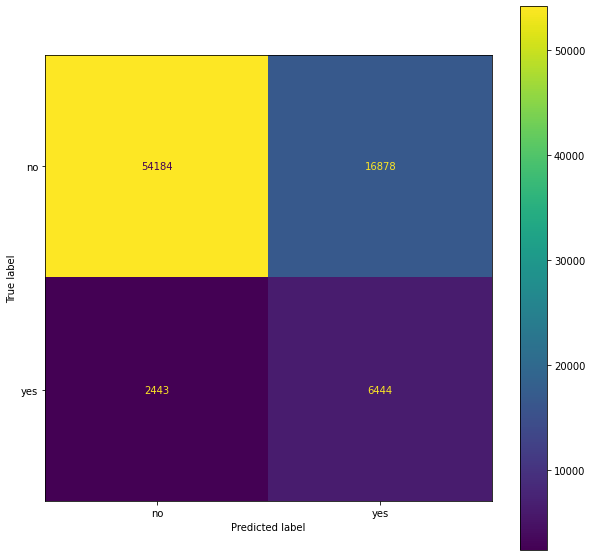

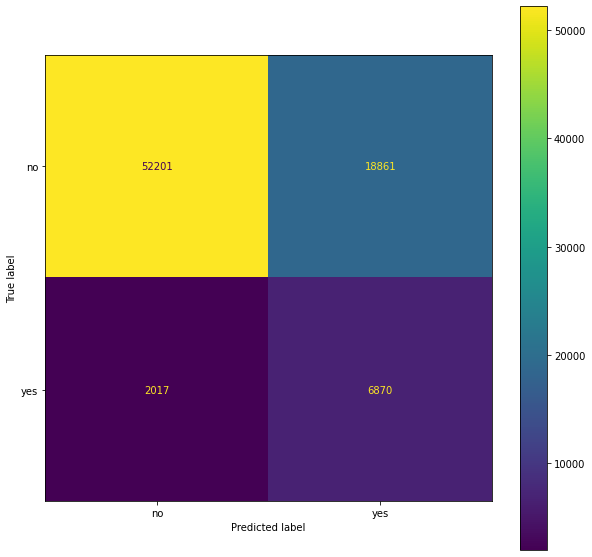

In [207]:
info(y_test, my_pred, sk_pred)

Логистическая регрессия больше подходит для классификации, так как она выдает значения в пределах четких границ, которые просто интерпретировать.

У модели более хороший recall и precision.
Тажке я заметил, что логистическая регрессия чувствительна к нормированию данных и балансу классов.


### SVM

In [103]:
class SVM(ClassifierMixin, BaseEstimator):

    def __init__(self, lr=0.001, alpha=0.01, n_iters=1000):
        self.lr = lr
        self.alpha = alpha
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def get_params(self, deep = True):
        return {"lr": self.lr, "n_iters" : self.n_iters, "alpha": self.alpha}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, Y):
        n, m = X.shape
        
        y_ = np.where(Y < 0.5, -1, 1)
        
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.alpha * self.w)
                else:
                    self.w -= self.lr * (2 * self.alpha * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return (np.sign(approx) + 1) / 2

In [148]:
model = Pipeline([("Scaler", scaler), ("SVM", SVM(n_iters=10))])
model.fit(x_train_balanced, y_train_balanced)
pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.7755319015872619


In [113]:
from sklearn import svm
model = Pipeline([("Scaler", scaler), ("SVM", svm.SVC(max_iter=1000, kernel="linear"))])
model.fit(x_train_balanced, y_train_balanced)
pred = model.predict(x_test)
print(min(pred), max(pred))
sk_pred = np.where(pred > 0.5, 1.0, 0.0)
print(accuracy_score(y_test, sk_pred))

d:\python\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.0 1.0
0.5831342480831531


Accuracy: 0.6727788965465484
Accuracy sklearn model: 0.5831342480831531
Recall: 0.8272757961066727
Recall sklearn model: 0.6544390683020141
Precision: 0.22990806179248233
Precision sklearn model: 0.1612286197432983
Roc-auc: 0.7403666701115391
Roc-auc sklearn model: 0.614327974667739


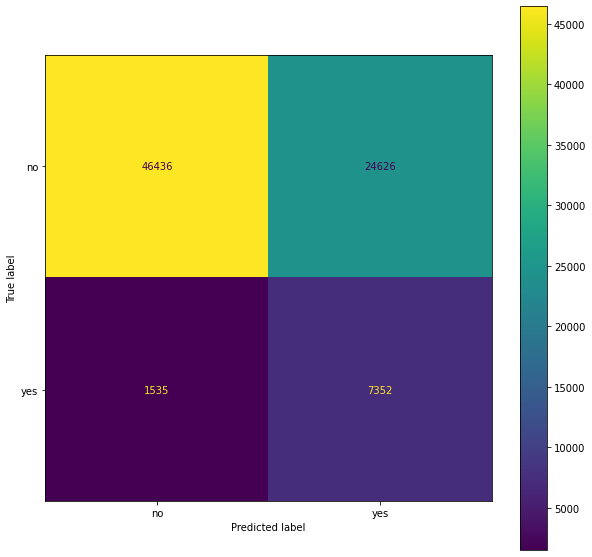

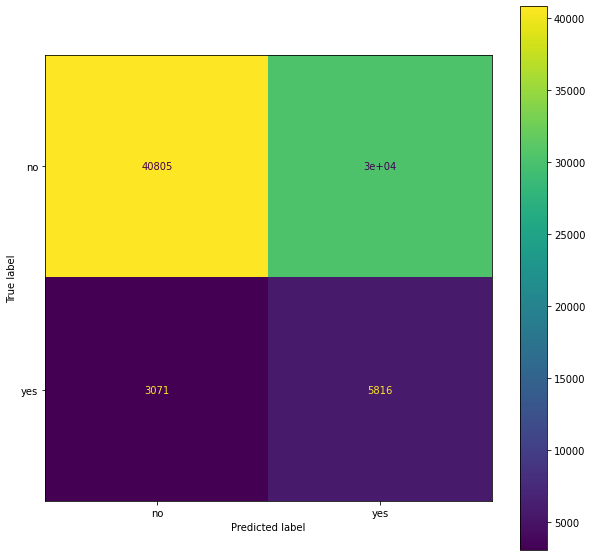

In [114]:
info(y_test, my_pred, sk_pred)

SVN имеет хороший recall, но и также высокий precision.

Модель чувствительна к нормированию и балансу классов.

### KNN

In [9]:
from sklearn.metrics import euclidean_distances
class KNN(ClassifierMixin, BaseEstimator):
    def __init__(self, nb):
        self.nb = nb

    def fit(self, X, Y):
        self.X_ = X
        self.y_ = Y
        self.classes = np.unique(Y)
    
    def get_params(self, deep = True):
        return {"nb": self.nb}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def predict(self, X):
        y = np.ndarray((X.shape[0],))
        for i, elem in enumerate(X):
            distances = euclidean_distances([elem], self.X_)[0]
            neighbors = np.argpartition(distances, kth = self.nb - 1)
            k_neighbors = neighbors[:self.nb]
            labels, cnts = np.unique(self.y_[k_neighbors], return_counts = True)
            y[i] = labels[cnts.argmax()]
        return y


In [10]:
model = KNN(nb=5)
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.710552977523171


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_balanced, y_train_balanced)
sk_pred = model.predict(x_test)
print(accuracy_score(y_test, sk_pred))

0.7101527223605049


Accuracy: 0.710552977523171
Accuracy sklearn model: 0.7101527223605049
Recall: 0.7179025542927873
Recall sklearn model: 0.7170023630021379
Precision: 0.23617383578885023
Precision sklearn model: 0.23573806881243065
Roc-auc: 0.7137681975820696
Roc-auc sklearn model: 0.713149235313233


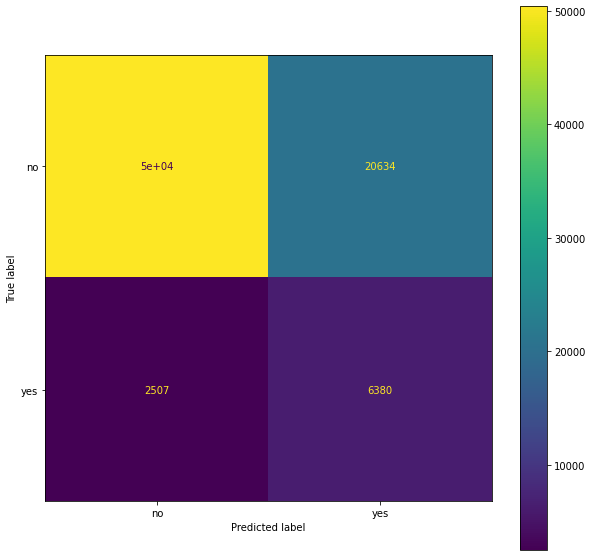

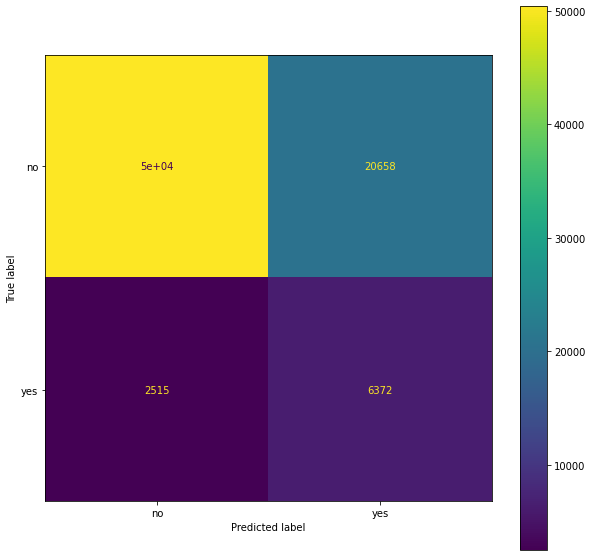

In [12]:
info(y_test, my_pred, sk_pred)

Модель не очень чувстительна к нормировнию данных.
Показала более лучшие метрики на сбалансированных данных.

### Naive Bayes

In [133]:
import math
class NaiveBayes(ClassifierMixin, BaseEstimator):
    def __init__(self):
       pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        labels, counts = np.unique(self.y, return_counts = True)
        self.labels = labels
        self.freq = np.array([i / self.y.shape[0] for i in counts])
        self.means = np.array([self.X[self.y == i].mean(axis = 0) for i in labels])
        self.stds = np.array([self.X[self.y == i].std(axis = 0) for i in labels])
        return self

    def gaussian(self, mu, sigma, x0):
        return np.exp(-(x0 - mu) ** 2 / (2 * sigma)) / np.sqrt(2.0 * math.pi * sigma)

    def predict(self, X):        
        res = np.zeros(X.shape[0])
        for i, x_i  in enumerate(X):
            freq = np.array(self.freq)
            for j, label_j in enumerate(self.labels):
                p_x_cond_y = np.array([self.gaussian(self.means[j][k], self.stds[j][k], x_i[k]) for k in range(X.shape[1])])
                freq[j] *= np.prod(p_x_cond_y)
            res[i] = np.argmax(freq)
        return res

In [150]:
model = Pipeline([("Scaler", scaler), ("NaiveBayes", NaiveBayes())])
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.predict(x_test)
print(accuracy_score(y_test, my_pred))

0.7755319015872619


In [151]:
from sklearn.naive_bayes import GaussianNB
model = Pipeline([("Scaler", scaler), ("NaiveBayes", GaussianNB())])
model.fit(x_train_balanced, y_train_balanced)
sk_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, sk_pred))

Accuracy: 0.7667387959824388


Accuracy: 0.7755319015872619
Accuracy sklearn model: 0.7667387959824388
Recall: 0.6112298863508495
Recall sklearn model: 0.6148306515134466
Precision: 0.2726497013501983
Precision sklearn model: 0.2640889318511358
Roc-auc: 0.7036546831208245
Roc-auc sklearn model: 0.7002835253570724


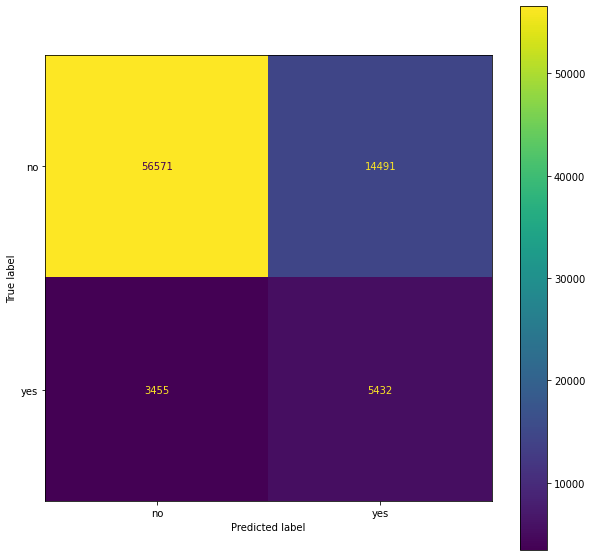

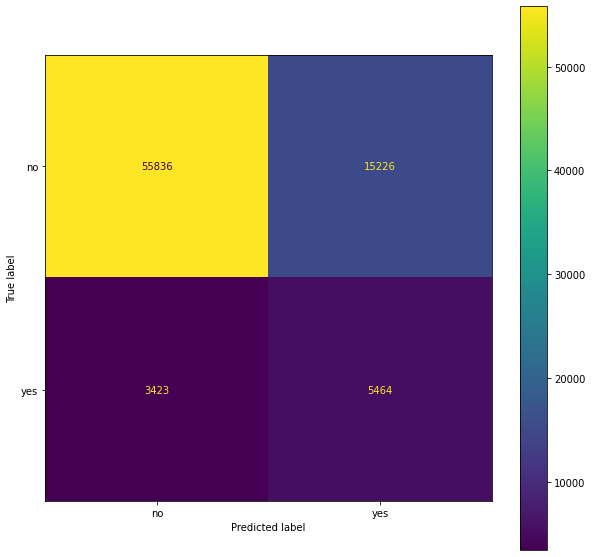

In [152]:
info(y_test, my_pred, sk_pred)

Naive Bayes имеет невысокий recall.
Показала более лучшие результаты на нормированных и сбалансированных данных.

## Подбор параметров

In [17]:
from sklearn.model_selection import GridSearchCV
import pickle

### Linear Regression

In [18]:
model = GridSearchCV(Pipeline([("Scaler", scaler), ("Linear", linear_model.LinearRegression())]),
                   {"Linear__fit_intercept" : [True, False]})
model.fit(x_train, y_train)
my_pred = model.best_estimator_.predict(x_test)
my_pred = np.where(my_pred > np.mean(my_pred), 1.0, 0.0)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'Linear__fit_intercept': True}
Лучший счёт модели: 0.15082723373344326


In [19]:
with open('LinReg.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.6473877096649113
Recall: 0.22170001730004035
Precision: 0.8651963542252729
Roc-auc: 0.5976174109519178


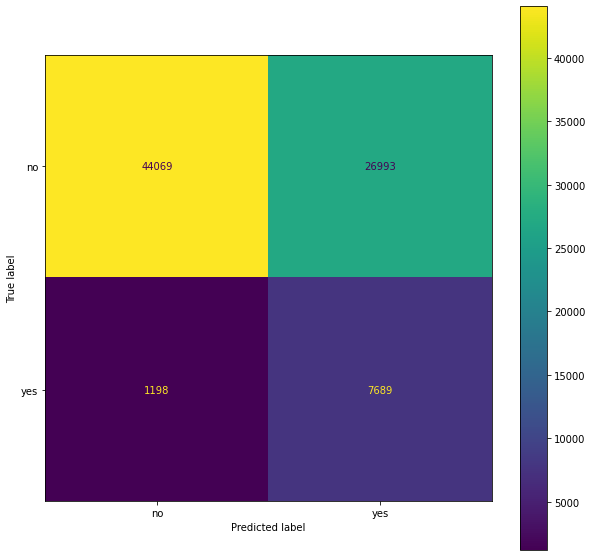

In [20]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "lin reg")

### Logistic Regression

In [208]:
model = GridSearchCV(Pipeline([("Scaler", scaler), ("LogReg", LogisticRegression())]),
                   {"LogReg__lr" : [0.05, 0.01, 0.005],
                    "LogReg__max_iters" : [100, 200, 500, 2000]})
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'LogReg__lr': 0.05, 'LogReg__max_iters': 2000}
Лучший счёт модели: 0.7572612210605539


In [209]:
with open('LogReg.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.7347433989168095
Recall: 0.2647418270699664
Precision: 0.7800157533475863
Roc-auc: 0.614189940783193


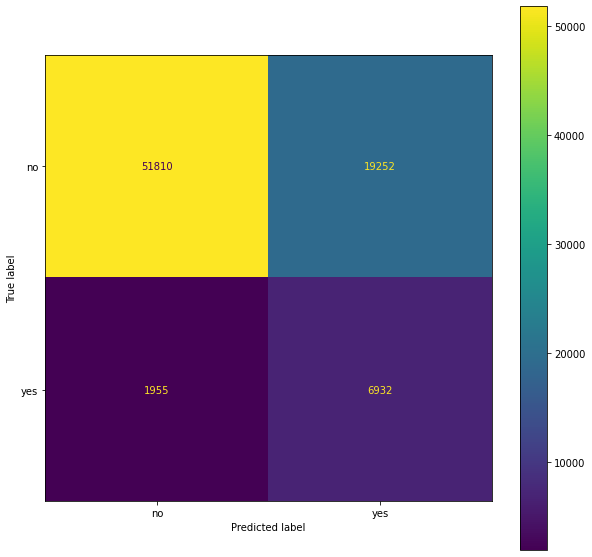

In [210]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "log reg")

### SVM

In [211]:
model = GridSearchCV(Pipeline([("Scaler", scaler), ("SVM", SVM())]),
                   {"SVM__n_iters" : [20],
                    "SVM__lr" : [0.01, 0.001],
                    "SVM__alpha" : [0.01, 0.005]})
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'SVM__alpha': 0.01, 'SVM__lr': 0.001, 'SVM__n_iters': 20}
Лучший счёт модели: 0.7545669371079547


In [212]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.7122290460168358
Recall: 0.2518104478661323
Precision: 0.8060087768650839
Roc-auc: 0.6091683348198106


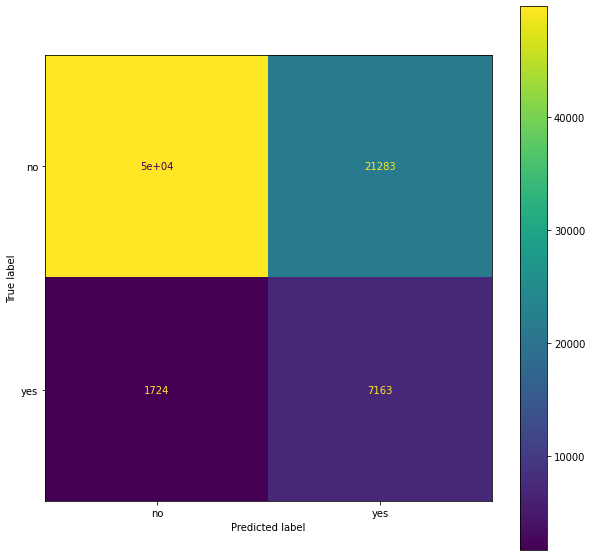

In [213]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "svm")

### KNN

Моя реализация KNN работает довольно долго, поэтому я использую библиотечную реализацию

In [221]:
model = GridSearchCV(Pipeline([("KNN", KNeighborsClassifier())]),
                   {"KNN__n_neighbors" : [13, 9, 7, 5],
                    "KNN__metric": ["euclidean","minkowski"]})
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Лучший счёт модели: 0.7346556331455557


In [222]:
with open('KNN.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.7184830329334951
Recall: 0.24710338680926916
Precision: 0.7487341059975244
Roc-auc: 0.6024939992834373


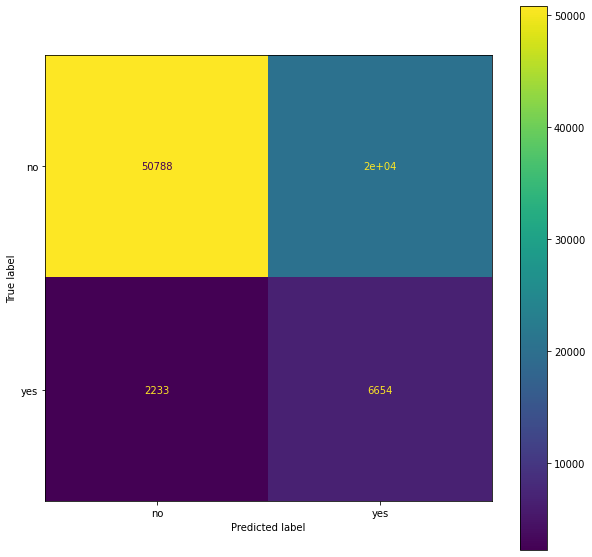

In [223]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "knn")

### Naive Bayes

In [224]:
model = GridSearchCV(Pipeline([("Scaler", scaler), ("NaiveBayes", NaiveBayes())]), {})
model.fit(x_train_balanced, y_train_balanced)
my_pred = model.best_estimator_.predict(x_test)
print("Лучшие гиперпараметры модели:", model.best_params_)
print("Лучший счёт модели:", model.best_score_)

Лучшие гиперпараметры модели: {}
Лучший счёт модели: 0.7084001932967563


In [225]:
with open('NaiveBayes.pickle', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.7755319015872619
Recall: 0.2726497013501983
Precision: 0.6112298863508495
Roc-auc: 0.6075456549932279


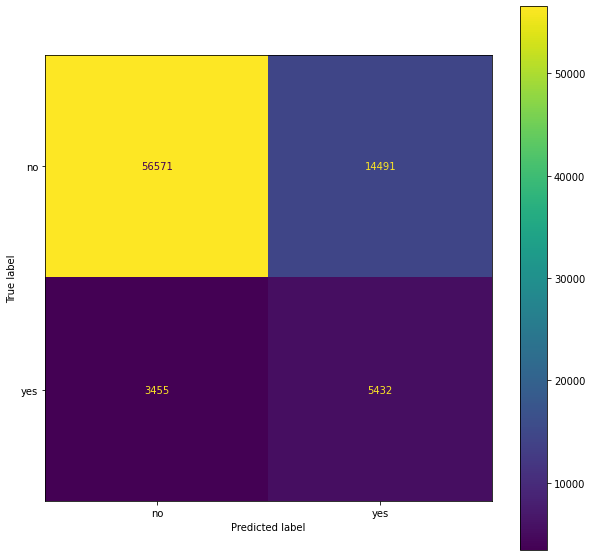

In [226]:
metrics(my_pred, y_test)
plot_confusion_matrix(y_test, my_pred, "naive_bayes")